Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Caliese Beckford"
COLLABORATORS = ""

---

# Mover Lab
In this lab, you will learn to use Movers to manipulate poses.

In [1]:
import sys
if 'google.colab' in sys.modules:
  !pip install pyrosettacolabsetup
  import pyrosettacolabsetup
  pyrosettacolabsetup.mount_pyrosetta_install()
import pyrosetta
pyrosetta.init()


Mounted at /content/google_drive

Note that USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE.
See https://github.com/RosettaCommons/rosetta/blob/main/LICENSE.md or email license@uw.edu for details.

Looking for compatible PyRosetta wheel file at google-drive/PyRosetta/colab.bin//wheels...
Found compatible wheel: /content/google_drive/MyDrive/PyRosetta/colab.bin/wheels//content/google_drive/MyDrive/PyRosetta/colab.bin/wheels/pyrosetta-2024.19+release.a34b73c40f-cp310-cp310-linux_x86_64.whl


┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENS

In [2]:
# cd into the right directory here:
!cd google_drive/MyDrive/CodeSchool2024/
# YOUR CODE HERE

Let's load the structure 2WPT, which is a complex of protein Im2 and colicin E9 DNase. Researchers have introduced various mutations to the interface to study the changes of binding free energy.

In [4]:
# YOUR CODE HERE
pose = pyrosetta.pose_from_file("google_drive/MyDrive/CodeSchool2024/inputs/2wpt.pdb")

core.chemical.GlobalResidueTypeSet: Finished initializing fa_standard residue type set.  Created 985 residue types
core.chemical.GlobalResidueTypeSet: Total time to initialize 1.01276 seconds.
core.import_pose.import_pose: File 'google_drive/MyDrive/CodeSchool2024/inputs/2wpt.pdb' automatically determined to be of type PDB
core.chemical.GlobalResidueTypeSet: Loading (but possibly not actually using) 'GOL' from the PDB components dictionary for residue type 'pdb_GOL'
core.chemical.GlobalResidueTypeSet: Loading (but possibly not actually using) 'NO3' from the PDB components dictionary for residue type 'pdb_NO3'
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue GLN:CtermProteinFull 82
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue LYS:CtermProteinFull 198


Visualize this wild type version of the complex in PyMOL. Color the structure by chains. How many chains are there?

Insert a picture of the structure colored by chain here.

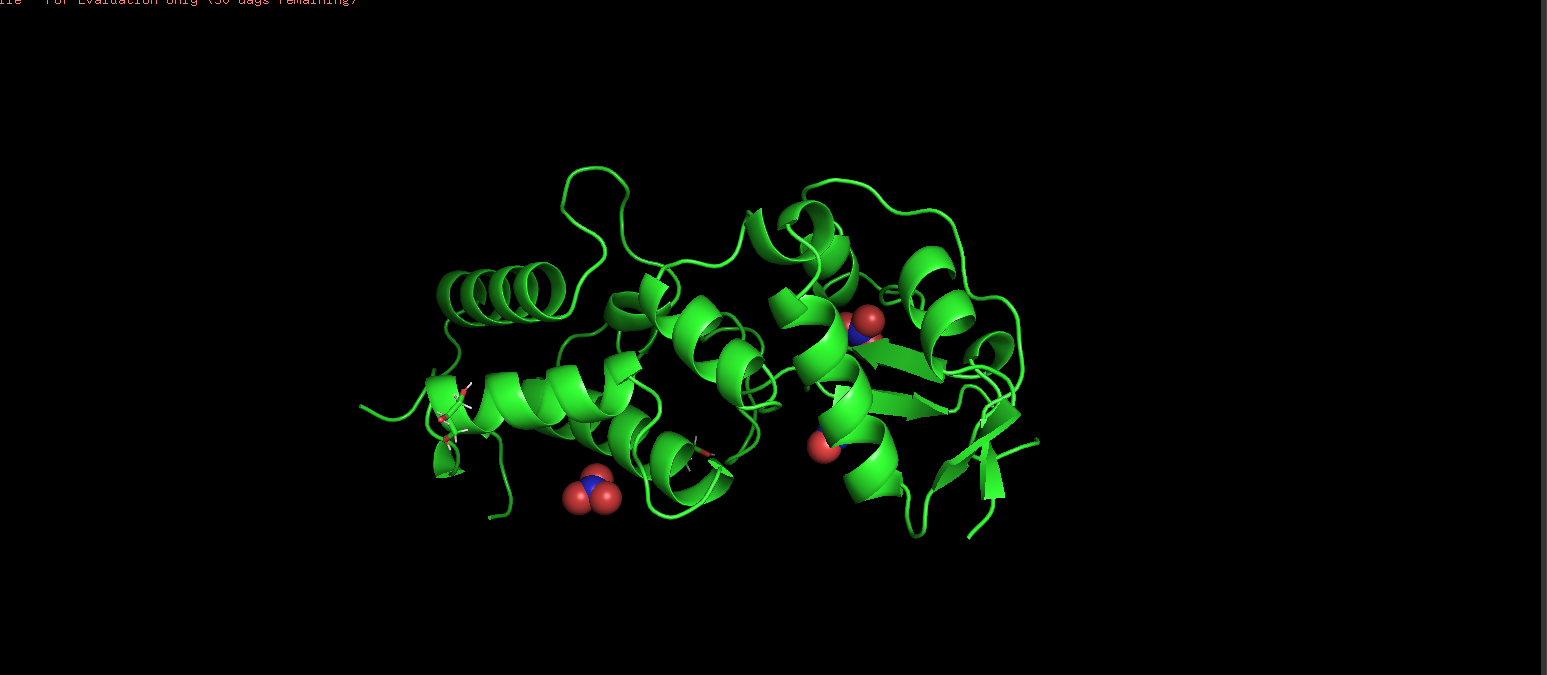

In [ ]:
# type your answers here and take a screenshot of your PyMOL session to submit
There are two chains


## Backbone movers
Let's try to modify the protein backbone. The simplest way to sample backbone conformations is introducing random perturbations. The SmallMover makes small independent random perturbations of the phi and psi torsion angles of random residues. It uses the rama score to ensure that only favorable backbone torsion angles are being selected. Let's initialize a SmallMover and let it introduce 10 random perturbations. You can use the small mover by initializing `pyrosetta.rosetta.protocols.simple_moves.SmallMover()`

Figure out how to set the number of moves to 10 and then apply it to your pose.



In [9]:
# YOUR CODE HERE
SmallMover= pyrosetta.rosetta.protocols.simple_moves.SmallMover()
SmallMover.nmoves(10)
SmallMover.apply(pose)

core.scoring.ramachandran: shapovalov_lib::shap_rama_smooth_level of 4( aka highest_smooth ) got activated.
basic.io.database: Database file opened: scoring/score_functions/rama/shapovalov/kappa25/all.ramaProb


In [10]:
# now dump this new pose to a PDB file and once again visualize in PyMOL (take a screenshot to submit)
# name it 2wpt_small.pdb

# YOUR CODE HERE
pose.dump_pdb("google_drive/MyDrive/CodeSchool2024/inputs/2wpt_small.pdb")

True

In PyMol, compare the structures before and after perturbation. Do you find anything weird?


YOUR ANSWER HERE:

Yes, the C-terminus changes much more than the N-terminus. This is called the lever effect in backbone sampling. The change at a residue will propagate to all its downstream residues. Because of the lever-arm effect, backbone perturbations are not local and bad contacts can be easily introduced.

Look up the lever effect for proteins? What is it??

YOUR ANSWER HERE:

The ShearMover deals with the lever effect. Instead of independently sampling backbone torsions, it changes torsions of two consecutive residues together in a way that the downstream lever effect is reduced. Let's import a fresh pose, initialize a ShearMover and let it introduce 100 perturbations.

In [22]:
# YOUR CODE HERE
pose2 = pyrosetta.pose_from_file("google_drive/MyDrive/CodeSchool2024/inputs/2wpt.pdb")

ShearMover= pyrosetta.rosetta.protocols.simple_moves.ShearMover()
ShearMover.nmoves(100)
ShearMover.apply(pose2)

# now dump this new pose to a PDB file and once again visualize in PyMOL (take a screenshot to submit)
# name it 2wpt_shear.pdb

# YOUR CODE HERE
pose2.dump_pdb("google_drive/MyDrive/CodeSchool2024/inputs/2wpt_shear.pdb")

core.import_pose.import_pose: File 'google_drive/MyDrive/CodeSchool2024/inputs/2wpt.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue GLN:CtermProteinFull 82
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue LYS:CtermProteinFull 198


True

Now you should see that the lever-arm effect is reduced, but not completely gone.

"Backrub" is one method to realize true local sampling. The trade off is that backbone bond angles are changed slightly. Initialize a BackrubMover and apply 100 times.

In [28]:
# YOUR CODE HERE

pose3 = pyrosetta.pose_from_file("google_drive/MyDrive/CodeSchool2024/inputs/2wpt.pdb")

for i in range(100):
  BackrubMover= pyrosetta.rosetta.protocols.backrub.BackrubMover()
  #BackrubMover.nmoves(100)
  BackrubMover.apply(pose3)

# now dump this new pose to a PDB file and once again visualize in PyMOL (take a screenshot to submit)
# name it 2wpt_backrub.pdb

# YOUR CODE HERE

pose3.dump_pdb("google_drive/MyDrive/CodeSchool2024/inputs/2wpt_backrub.pdb")

core.import_pose.import_pose: File 'google_drive/MyDrive/CodeSchool2024/inputs/2wpt.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue GLN:CtermProteinFull 82
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue LYS:CtermProteinFull 198
core.mm.MMBondAngleLibrary: MM bond angle sets added fully assigned: 604; wildcard: 0 and 1 virtual parameter.
basic.io.database: Database file opened: sampling/branch_angle/branch_angle_1.txt
basic.io.database: Database file opened: sampling/branch_angle/branch_angle_2.txt
protocols.backrub.BackrubMover: Segment lengths: 3-34 atoms
protocols.backrub.BackrubMover: Main chain pivot atoms: CA
protocols.backrub.BackrubMover: Adding backrub segments for residues 1-200
protocols.backrub.BackrubMover: Total Segments Added: 1778
basic.io.database: Database file opened: sampling/branch_angle/branch_angle_1.txt
basic.io.database: Database file opened: sampling/b

True

Now you can see that the perturbations are evenly distributed throughout the structure.

# Mutate residues
Protein designers constantly explore conformation and sequence spaces of proteins. You already learned methods to sample the backbone conformation space, now it's time to consider introducing mutations.

A previous study showed that the N34V R38T mutations on chain A lowers binding free energy by -2.60 kcal/mol. Let's introduce these two mutations to our structure. Again, import a fresh pose.

In [29]:
# YOUR CODE HERE

pose4 = pyrosetta.pose_from_file("google_drive/MyDrive/CodeSchool2024/inputs/2wpt.pdb")

core.import_pose.import_pose: File 'google_drive/MyDrive/CodeSchool2024/inputs/2wpt.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue GLN:CtermProteinFull 82
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue LYS:CtermProteinFull 198


In Rosetta, residues in a pose are numbered from 1 to N which is the total number of residues. This indexing system is different from what you see from a PDB file. For example, the first lysine in our structure has Rosetta index 1 but its pdb index is A4. In order to introduce mutations, we need to first figure out the Rosetta indices of the residues of our interest. As we have done before, we will turn to the PDBInfo object attached to a pose. If you don't remember how to do this, go back to the pose lab.

In [30]:
# YOUR CODE HERE
print(pose4.pdb_info().pdb2pose('A', 4))

1


Use the MutateResidue mover to introduce mutations N34V R38T.

In [34]:
# YOUR CODE HERE

mutateResidueMover= pyrosetta.rosetta.protocols.simple_moves.MutateResidue()
#mutateResidueMover.nmoves(100)
mutateResidueMover.apply(pose4)

# now dump this new pose to a PDB file and once again visualize in PyMOL (take a screenshot to submit)
# name it 2wpt_mutate.pdb

# YOUR CODE HERE
pose4.dump_pdb("google_drive/MyDrive/CodeSchool2024/inputs/2wpt_mutate.pdb")

AttributeError: 'pyrosetta.rosetta.protocols.simple_moves.MutateRes' object has no attribute 'nmoves'

Now you should be able to see these mutations in PyMol. You have now learned movers that can help you explore the backbone and sequence spaces. You may have realized that the side chain conformations, which are very important, are not sampled. Side chain sampling will be covered in later labs.

## Exercises
1. Use the functions you learned from the previous lecture to score the poses before and after mutation. What is the change of the score value? Does it match the experimentally measured -2.60 kcal/mol? What score terms change significantly? What 10 residues' scores change the most? Do their changes make sense?


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# first, define the full atom score function and compare the scores between all pf the different pdbs you dumped
# make sure you are using the full-atom score function

# YOUR CODE HERE

raise NotImplementedError()

# define the different poses and get their scores

raise NotImplementedError()

what is the difference in scores between the original and mutated pose?

In [ ]:
# store the weights of the score function as weights and print the weights of the score function you have initialized

# YOUR CODE HERE
raise NotImplementedError()

An EMapVector is a PyRosetta class that creates an object (vector) that is used for storing energy data: an initialized EMapVector is a vector for storing energy data, initially all values are 0. Try printing `pyrosetta.rosetta.core.scoring.EMapVector()` to see that all of the values in the vector are 0. We can use EMapVectors to easily see the difference in energy for specific score terms between two poses.

In [ ]:
# YOUR CODE HERE

raise NotImplementedError()

We can use EMapVectors to more easily compute the energy differences between two different poses.

Using `pose.energies().` and scrolling through the list of methods, find a method that returns the total energies of the pose.

assign the total energies of the unmutated pose to be `emap_pose` and the total energies of the mutated pose to be `emap_mutation`

In [ ]:
# YOUR CODE HERE

raise NotImplementedError()

Note that EmapVectors are a class that we must initialize to be vectors with all 0 values before we use them. To assign energies to the EMapVectors, we can use something like `emap.assign(emap_pose)` where `emap` is our empty EMapVector and `emap_pose` are the total energies of the unmutated pose which you got above.

If you have `emap_pose` and `emap_mutation`, you can calculate the difference as follows:
```
emap1 = pyrosetta.rosetta.core.scoring.EMapVector()
emap1.assign(emap_pose)
print(emap1)

emap2 = pyrosetta.rosetta.core.scoring.EMapVector()
emap2.assign(emap_mutation)
print(emap2)

emap_temp = emap2
emap_temp -= emap1

print(emap_temp) # what does this return?
print(emap_temp.dot(weights)) # why do we do this?
```

In [ ]:
# YOUR CODE HERE

raise NotImplementedError()


1. Redo the mutagenesis and ddG calculation on backbone perturbed structures. How much do the results change? Why?

2. Generate a backbone ensemble made of 20 structures with your favorate backbone sampling method. Redo the mutagenesis and ddG calculation on each structure and take the mean/meadian/mimimal score. How much do the results change? Why?

3. The above ddG analysis is very crude and inaccurate. What improvements should be introduced to make it better?

In [ ]:
# the below exercises will be more explorative and should make use of everything they learned today so no answers :o

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()